PERSONAL SPOTIFY ACCOUNT ANALYSIS - A Dive into My Extended Streaming History

In [76]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from pathlib import Path
import pandas as pd
import json

data_path = Path("data/raw")

# Match both audio and video history files
files = sorted(data_path.glob("Streaming_History_*.json"))

# Load all JSONs
dfs = []
for file in files:
    with open(file, "r", encoding="utf-8") as f:
        df = pd.DataFrame(json.load(f))
        #We only want audio files 
        if "master_metadata_track_name" in df.columns and "master_metadata_album_artist_name" in df.columns:
            df = df[["ts","master_metadata_album_artist_name","master_metadata_track_name","ms_played","master_metadata_album_album_name"]]
            #Renaming these variables for readability
            df = df.rename(columns={
                "ts": "timestamp",
                "master_metadata_album_artist_name": "artist",
                "master_metadata_track_name": "track",
                "ms_played": "ms_played",
                "master_metadata_album_album_name": "album"
            })
            dfs.append(df)

spotify_df = pd.concat(dfs, ignore_index=True)

In [78]:

#Converting timestamp to a datatime value:
spotify_df["timestamp"] = pd.to_datetime(spotify_df["timestamp"], utc=True) 
# Convert from UTC to Central Time
spotify_df["timestamp_central"] = spotify_df["timestamp"].dt.tz_convert("US/Central")

#Creating Derived Columns for simplicity: 
spotify_df["mins_played"] = spotify_df["ms_played"] / 60000 #changing ms to mins
spotify_df["date"] = spotify_df["timestamp"].dt.date #creating date from timestamp
spotify_df["hour_central"] = spotify_df["timestamp_central"].dt.hour #creating hours from timestamp
#Converting to AM/PM
spotify_df["am_pm"] = spotify_df["hour_central"].apply(lambda h: "AM" if h < 12 else "PM")


#Basic Info about my Data: 
spotify_df.select_dtypes(include='object').describe().transpose()
spotify_df.head()

,timestamp,artist,track,ms_played,album,timestamp_central,mins_played,date,hour_central,am_pm
0,2024-09-16 22:34:45+00:00,PinkPantheress,Ophelia,155093,Heaven knows,2024-09-16 17:34:45-05:00,2.584883,2024-09-16,17,PM
1,2024-09-16 22:37:46+00:00,wave to earth,play with earth!,181000,play with earth! 0.03,2024-09-16 17:37:46-05:00,3.016667,2024-09-16,17,PM
2,2024-09-16 22:41:07+00:00,wave to earth,annie.,200943,play with earth! 0.03,2024-09-16 17:41:07-05:00,3.349050,2024-09-16,17,PM
3,2024-09-16 22:45:41+00:00,wave to earth,slow dive,273850,play with earth! 0.03,2024-09-16 17:45:41-05:00,4.564167,2024-09-16,17,PM
4,2024-09-16 22:51:53+00:00,wave to earth,Black Mountain,370800,Twenty Plenty,2024-09-16 17:51:53-05:00,6.180000,2024-09-16,17,PM


Top Artists, Tracks, and Albums By Minutes Played, TOP TEN ARTISTS, TRACKS, and ALBUMS

In [79]:
top_artists = spotify_df.groupby("artist")["mins_played"].sum().sort_values(ascending = False)
top_tracks = spotify_df.groupby("track")["mins_played"].sum().sort_values(ascending = False)
top_albums = spotify_df.groupby("album")["mins_played"].sum().sort_values(ascending = False)

top_artists
top_tracks
top_albums

#TOP TEN
top15_artists = top_artists.head(20)
top15_tracks = top_tracks.head(20)
top15_albums = top_albums.head(20)

top15_artists
top15_tracks
top15_albums

album
Submarine                                          1113.326917
Chip Chrome & The Mono-Tones                        517.591167
(((((ultraSOUND)))))                                509.311967
Making Steak                                        478.849183
play with earth! 0.03                               449.259117
HIT ME HARD AND SOFT                                418.270617
Red Moon In Venus                                   411.596100
after the sun goes down                             394.055683
Immunity                                            369.799833
CINEMA                                              347.336567
NEVER ENOUGH                                        308.000250
Chip Chrome & The Mono-Tones (Deluxe)               288.308750
This Old Dog                                        264.216800
to hell with it                                     261.317850
Freudian                                            259.606700
Hard To Imagine The Neighbourhood Ever Changing  

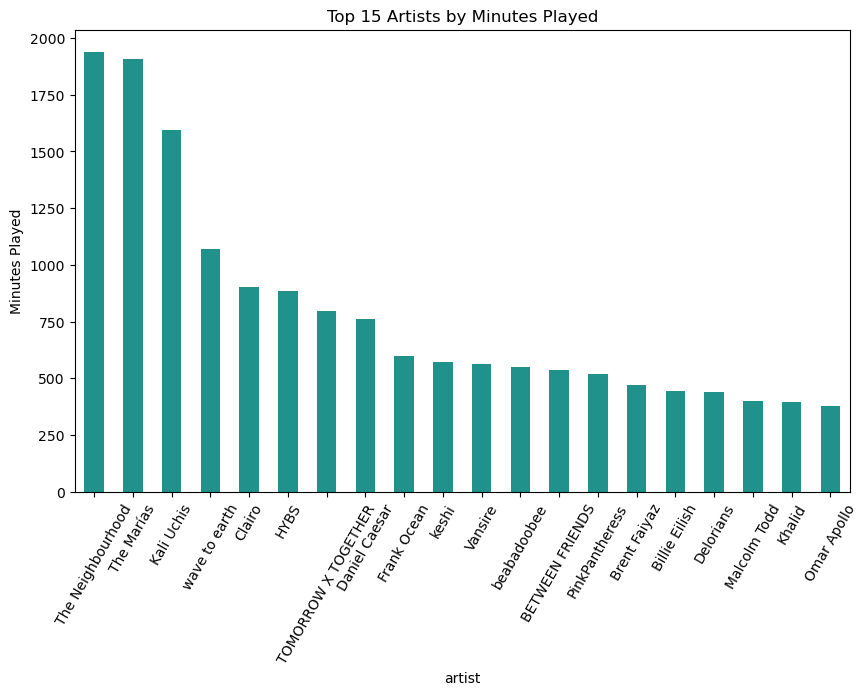

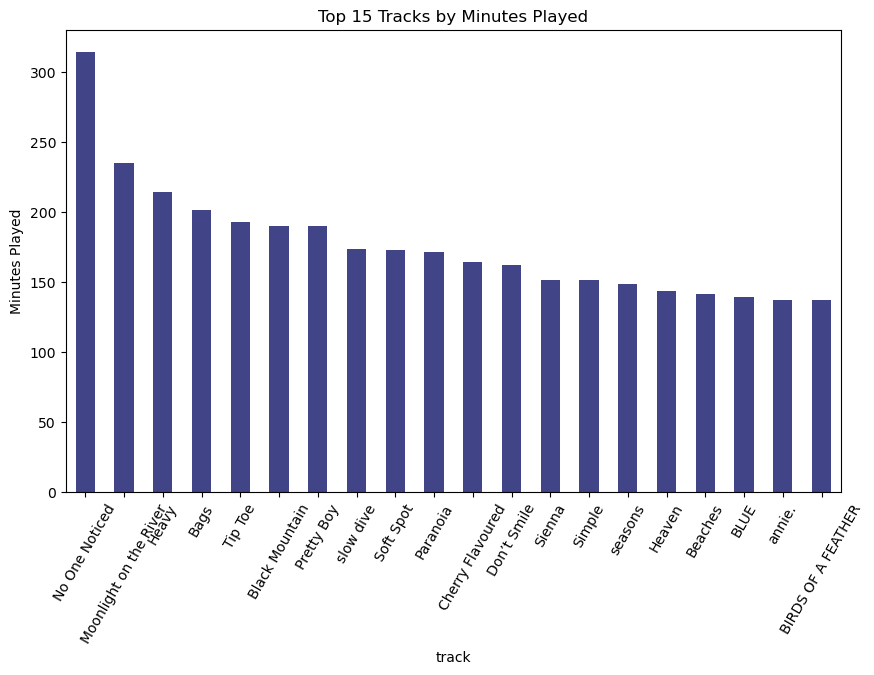

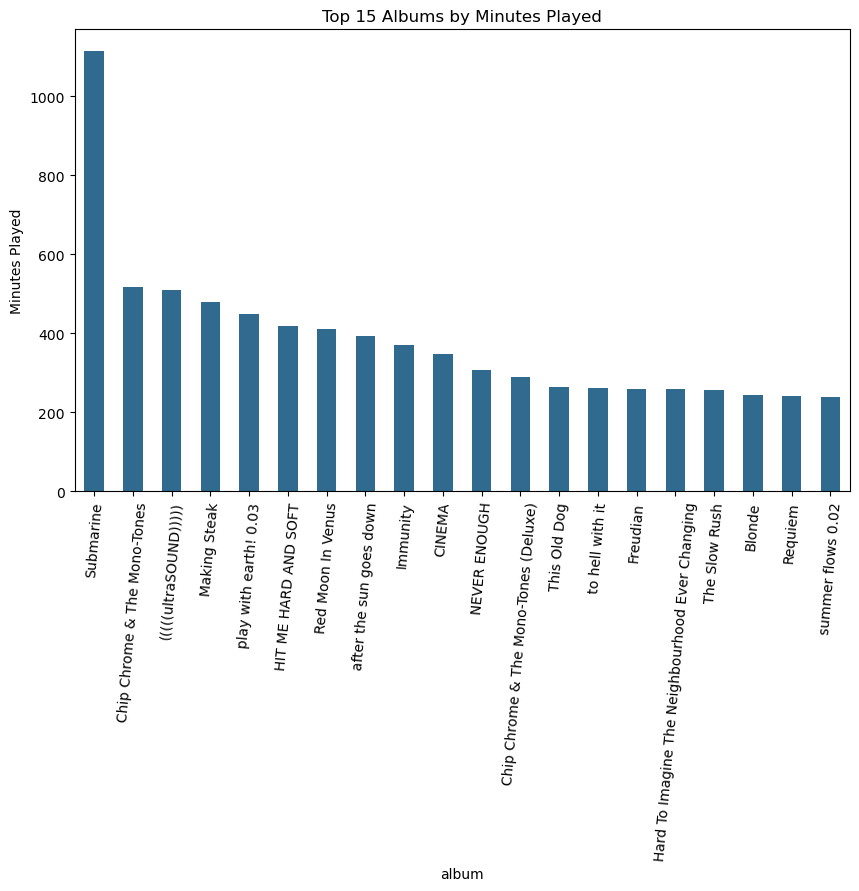

In [80]:
from matplotlib import cm
#list(colormaps)
#TOP 15 ARTISTS by MINS PLAYED
top15_artists.plot(kind="bar",color =cm.viridis(0.5), figsize=(10,6))
plt.xticks(rotation=60)
plt.ylabel("Minutes Played")
plt.title("Top 15 Artists by Minutes Played")
plt.show()

#TOP 15 TRACKS by MINS PLAYED
top15_tracks.plot(kind="bar",color =cm.viridis(0.2) , figsize=(10,6))
plt.xticks(rotation=60)
plt.ylabel("Minutes Played")
plt.title("Top 15 Tracks by Minutes Played")
plt.show()

#TOP 15 ALBUMS by MINS PLAYED
top15_albums.plot(kind="bar",color =cm.viridis(0.34), figsize=(10,6))
plt.xticks(rotation=85)
plt.ylabel("Minutes Played")
plt.title("Top 15 Albums by Minutes Played")
plt.show()

I will NEXT analyze at what time I play the most music.